Importing the Dependencies

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgb


Data Collection and Processing

In [8]:
loan_approval_dataset = pd.read_csv('loan_approval_dataset.csv')

In [9]:
type(loan_approval_dataset)

pandas.core.frame.DataFrame

In [ ]:
loan_approval_dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [10]:
loan_approval_dataset.shape

(614, 13)

In [11]:
loan_approval_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:

numeric_columns = ['LoanAmount', 'Loan_Amount_Term']

for col in numeric_columns:
    loan_approval_dataset[col].fillna(loan_approval_dataset[col].median(), inplace=True)


In [13]:
string_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

for col in string_columns:
    loan_approval_dataset[col].fillna(loan_approval_dataset[col].mode()[0], inplace=True)

In [14]:
loan_approval_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
loan_approval_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Data Visualization

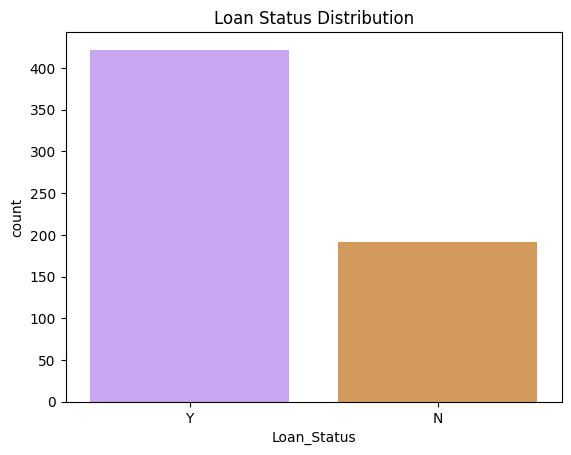

In [42]:
sns.countplot(x="Loan_Status", data=loan_approval_dataset, hue='Loan_Status', palette=["#C799FF", "#E79C47"])
plt.title("Loan Status Distribution")
plt.show()

<Axes: xlabel='Education', ylabel='count'>

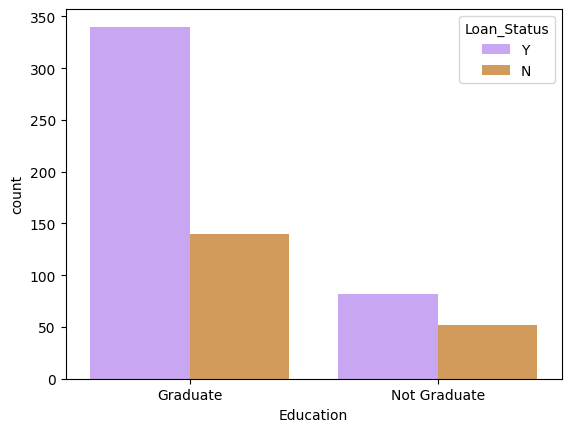

In [43]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_approval_dataset, palette=["#C799FF", "#E79C47"])

<Axes: xlabel='Married', ylabel='count'>

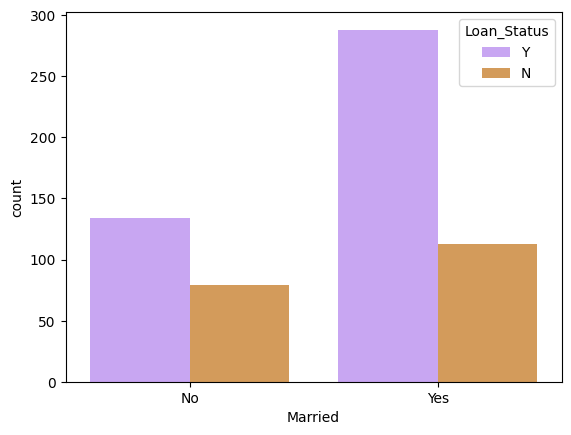

In [44]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_approval_dataset, palette=["#C799FF", "#E79C47"])

<Axes: xlabel='Gender', ylabel='count'>

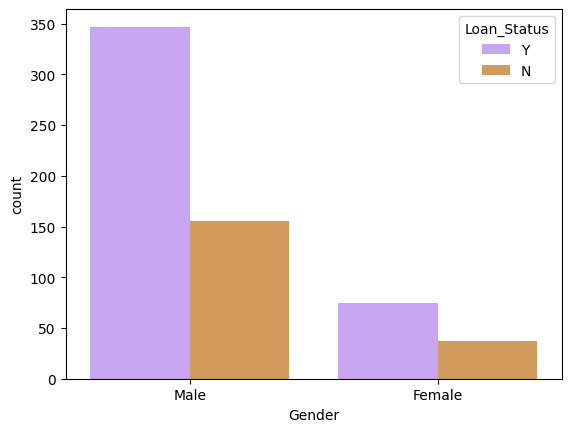

In [45]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan_approval_dataset, palette=["#C799FF", "#E79C47"])

In [46]:

X = loan_approval_dataset.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_approval_dataset['Loan_Status'].map({'Y': 1, 'N': 0})


X['Dependents'] = X['Dependents'].astype(str)

In [47]:
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns
string_columns = X.select_dtypes(include=["object"]).columns

In [49]:
from sklearn.pipeline import Pipeline
numeric_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler())
])

string_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_columns),
    ("cat", string_pipeline, string_columns)
])

Train Test Split

In [52]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (491, 11) (123, 11)


In [54]:
# Combine X_test and y_test
test_data = X_test.copy()
test_data["Loan_Status"] = y_test

# Save to CSV
test_data.to_csv("test_data.csv", index=False)


In [26]:
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
143,Male,Yes,0,Graduate,No,2698,2034.0,122.0,360.0,1.0,Semiurban,1
218,Male,Yes,2,Graduate,No,5000,0.0,72.0,360.0,0.0,Semiurban,0
312,Female,No,0,Graduate,No,2507,0.0,56.0,360.0,1.0,Rural,1
546,Male,No,0,Not Graduate,No,3358,0.0,80.0,36.0,1.0,Semiurban,0
36,Male,Yes,0,Graduate,No,1828,1330.0,100.0,360.0,0.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100,Male,Yes,2,Not Graduate,No,4288,3263.0,133.0,180.0,1.0,Urban,1
288,Female,No,0,Graduate,No,4124,0.0,115.0,360.0,1.0,Semiurban,1
122,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,1
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


### Training the model:

In [57]:
def evaluateModel(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred)
    }

    return metrics


In [60]:
models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000, class_weight='balanced'),
        {
            "classifier__C": [0.01, 0.1]
        }
    ),

    "Decision Tree": (
        DecisionTreeClassifier(random_state=42,class_weight='balanced'),
        {
            "classifier__max_depth": [3, 5],
            "classifier__min_samples_split": [2, 5]
        }
    ),

    "KNN": (
        KNeighborsClassifier(),
        {
            "classifier__n_neighbors": [3, 6, 9]
        }
    ),

    "Naive Bayes": (
        GaussianNB(),
        {}
    ),

    "Random Forest": (
        RandomForestClassifier(random_state=42, class_weight='balanced'),
        {
           "classifier__n_estimators": [150, 250, 300],
            "classifier__max_depth": [5, 15],
            "classifier__min_samples_split": [2, 5, 6],
            "classifier__min_samples_leaf": [1, 3, 4],
            "classifier__max_features": ["sqrt"],

        }
    ),

    "XGBoost": (
        XGBClassifier(
            eval_metric="logloss",
            random_state=42,
        ),
        {
            "classifier__n_estimators": [200, 300, 450],
            "classifier__learning_rate": [0.01, 0.001, 0.05, 0.1],
            "classifier__max_depth": [2, 3, 5, 7],
            "classifier__subsample": [0.8, 1.0],
            "classifier__colsample_bytree": [0.8, 1.0],
            "classifier__reg_lambda": [1, 5, 10, 11]
      }
    )
}

In [63]:
from sklearn.model_selection import GridSearchCV


bestModels = {}
results = []

for name, (model, params) in models.items():
    print(f"\nTraining {name}...")

    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    grid = GridSearchCV(
        pipe,
        params,
        cv=5,
        scoring="f1",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    bestModels[name] = grid.best_estimator_

    print(f"{name} best params:", grid.best_params_)
    print(f"{name} best CV score:", grid.best_score_)

    metrics = evaluateModel(
        grid.best_estimator_,
        X_test,
        y_test
    )

    metrics["Model"] = name
    results.append(metrics)



Training Logistic Regression...
Logistic Regression best params: {'classifier__C': 0.01}
Logistic Regression best CV score: 0.8711466461802567

Training Decision Tree...
Decision Tree best params: {'classifier__max_depth': 3, 'classifier__min_samples_split': 2}
Decision Tree best CV score: 0.8349813711777955

Training KNN...
KNN best params: {'classifier__n_neighbors': 9}
KNN best CV score: 0.8609435219889334

Training Naive Bayes...
Naive Bayes best params: {}
Naive Bayes best CV score: 0.8634531003262411

Training Random Forest...
Random Forest best params: {'classifier__max_depth': 15, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
Random Forest best CV score: 0.8513921723199955

Training XGBoost...
XGBoost best params: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 7, 'classifier__n_estimators': 450, 'classifier__reg_lambda': 11, 'classifi

In [64]:
results = pd.DataFrame(results)
results.set_index("Model", inplace=True)
results


,Accuracy,AUC,Precision,Recall,F1 Score,MCC
Model,,,,,,
Logistic Regression,0.837398,0.766873,0.809524,1.000000,0.894737,0.619240
Decision Tree,0.674797,0.715789,0.800000,0.705882,0.750000,0.294723
KNN,0.821138,0.696749,0.800000,0.988235,0.884211,0.569458
Naive Bayes,0.837398,0.763467,0.815534,0.988235,0.893617,0.611360
Random Forest,0.813008,0.771053,0.810000,0.952941,0.875676,0.536759
XGBoost,0.829268,0.777399,0.813725,0.976471,0.887701,0.585097


In [70]:
import joblib
import os

os.makedirs("models", exist_ok=True)

for name, model in bestModels.items():
    file_name = name.replace(" ", "") + ".pkl"
    joblib.dump(model, f"models/{file_name}")